In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import glob
import os

import sklearn
import statsmodels
from sklearn.model_selection import train_test_split 

import tensorflow as tf
from tensorflow import keras

from matplotlib import rc        # for Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 경고 문구 off
import warnings
warnings.filterwarnings('ignore')

Init Plugin
Init Graph Optimizer
Init Kernel


# 1. Summary


### (1) TensorFlow

    <케라스 모델> : Sequential 클래스
      모델  : model = keras.models.Sequential()
      층생성 : model.add(keras.layers.Dense(10, activation='softmax', input_shape=(784,))
             model.compile(loss='sparse_categorical_crossentropy'(손실함수), metrics='accuracy')
      훈련  : model.fit(x_train, y_train, epochs=5(반복횟수))
      평가  : model.evaluate(x_val, y_val)
 
      
#### - Dense( )
    신경망에서 가장 기본층인 밀집층을 만드는 클래스
    이 층의 첫 번째 매개변수에 뉴런의 개수를 지정
    activation 매개변수에는 사용할 활성화 함수를 지정
    대표적으로 'sigmoid', 'softmax' 함수가 있음
    아무것도 지정하지 않으면 활성화 함수를 사용하지 않음
    케라스의 Sequential 클래스에 맨 처음 추가되는 층에는 input_shape 매개변수로 입력의 크기를 지정해야 함

#### - Sequential( )
    케라스에서 신경망 모델을 만드는 클래스
    이 클래스의 객체를 생성할 때 신경망 모델에 추가할 층을 지정할 수 있음
    추가할 층이 1개 이상일 경우 파이썬 리스트로 전달

#### - compile( )
    모델 객체를 만든 후 훈련하기 전에 사용할 손실 함수와 측정 지표 등을 지정하는 메서드
    loss 매개변수에 손실 함수를 지정
    이진 분류일 경우 'binary_crossentropy', 다중 분류일 경우 'categorical_crossentropy'를 지정
    클래스 레이블이 정수일 경우 'sparse_categorical_crossentropy'로 지정
    회귀 모델일 경우 'mean_square_error' 등으로 지정할 수 있음
    metrics 매개변수에 훈련 과정에서 측정하고 싶은 지표를 지정할 수 있음
    측정 지표가 1개 이상일 경우 리스트로 전달

#### - fit( )
    모델을 훈련하는 메서드
    첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달
    epochs 매개변수에 전체 데이터에 대해 반복할 에포크 횟수를 지정

#### - evaluate( )
    모델 성능을 평가하는 메서드임
    첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달
    compile() 메서드에서 loss 매개변수에 지정한 손실 함수의 값과 metrics 매개변수에서 지정한 측정 지표를 출력함


### (2) 케라스 손실 함수
- 이진 분류 : loss = 'binary_crossentropy'
- 다중 분류 : loss = 'categorical_crossentropy'


### (3) compile( ) : loss

    1) loss='sparse_categorical_crossentropy'
   
    : 다중 분류에서 크로스 엔트로피 손실함수를 사용하려면 0, 1, 2와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야 하는데
      텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 그냥 사용할 수 있음
      정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것을 'sparse_categorical_crossentropy'라고 함
      빽빽한 배열 말고 정숫값 하나만 사용한다는 뜻에서 sparse(최소)라는 이름을 붙임
      
    2) loss='categorical_crossentropy'

    : 타깃값을 원-핫 인코딩으로 준비했다면 compile() 메서드에 손실 함수를 loss='categorical_crossentropy'로 지정


### (4) compile( ) : metrics

    : 케라스는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력해 줌
      손실이 줄어드는 것을 보고 훈련이 잘되었다는 것을 알 수 있지만 정확도를 함께 출력하면 더 좋음
      이를 위해 metrics 매개변수에 정확도 지표를 의미하는 'accuracy'를 지정
 

### (5) 이미지 분류 문제에서 높은 성능을 낼 수 있는 활성화 함수에 대해 알아보기

    - 렐루 활성화 함수
      : 초창기 인공 신경망의 은닉층에 많이 사용된 활성화 함수는 시그모이드 함수였음
        하지만 이 함수는 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 올바른 출력을
        만드는데 신속하게 대응하지 못함
        특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만듦
        이를 개선하기 위해 다른 종류의 활성화 함수가 제안되었는데 바로 '렐루 함수'
    
    
### (6) 옵티마이저

      : 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법을 말함
        케라스에는 다양한 경사 하강법 알고리즘이 구현되어 있음
        대표적으로 Adam, SGD, 네스테로프 모멘텀, RMSprop 등이 있음


[1] 혼자 공부하는 머신러닝 + 딥러닝

# 2. Project_RockScissorsPaper

### (1) 데이터 불러오기 + Resizing

In [2]:
# Rock
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  

    target_size=(28,28)   # 파일 모두 28x28 사이즈로 바꾸어 저장
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")

image_dir_path = os.getenv("HOME") + "/rsp/rock"
resize_images(image_dir_path)  #550장

# Scissors
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")

image_dir_path = os.getenv("HOME") + "/rsp/scissors"
resize_images(image_dir_path)  #550장

# Paper
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")
    
image_dir_path = os.getenv("HOME") + "/rsp/paper"
resize_images(image_dir_path)  #550장

### (2) Train_data, Validation_data 생성

In [3]:
def load_data(img_path, number_of_data=1650):  # 가위바위보 이미지 개수 총 1650장
    img_size=28
    color=3
    # 이미지 데이터와 라벨(가위:0, 바위:1, 보:2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   #가위:0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=1   #바위:1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   #보:2
        idx=idx+1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/rsp"
X_train, Y_train = load_data(image_dir_path)
X_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_train, x_val, y_train, y_val = train_test_split(X_train_norm, Y_train, test_size=0.2, random_state=42)
# → Traning_data(1320장), Validation_data(330장) 생성

### (3) 이미지 샘플 불러오기

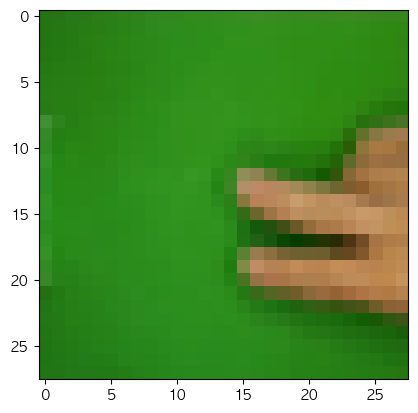

In [4]:
plt.imshow(x_train[0])
plt.show()

### (4) 딥러닝 네트워크 설계하기

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Metal device set to: Apple M1 Pro
Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                25616     
________________________________________________________________

2022-12-29 14:40:39.741548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-29 14:40:39.741663: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### (5) 딥러닝 네트워크 학습과 검증

Epoch 1/20


2022-12-29 14:40:39.827327: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-29 14:40:39.827492: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-29 14:40:39.941213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42/42 - 1s - loss: 0.8781 - accuracy: 0.6295 - val_loss: 0.6108 - val_accuracy: 0.7667


2022-12-29 14:40:40.331983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
42/42 - 0s - loss: 0.4553 - accuracy: 0.8538 - val_loss: 0.3676 - val_accuracy: 0.8667
Epoch 3/20
42/42 - 0s - loss: 0.2682 - accuracy: 0.9235 - val_loss: 0.2153 - val_accuracy: 0.9273
Epoch 4/20
42/42 - 0s - loss: 0.1964 - accuracy: 0.9326 - val_loss: 0.2433 - val_accuracy: 0.9030
Epoch 5/20
42/42 - 0s - loss: 0.1591 - accuracy: 0.9470 - val_loss: 0.1529 - val_accuracy: 0.9515
Epoch 6/20
42/42 - 0s - loss: 0.1153 - accuracy: 0.9682 - val_loss: 0.1312 - val_accuracy: 0.9606
Epoch 7/20
42/42 - 0s - loss: 0.0998 - accuracy: 0.9720 - val_loss: 0.1798 - val_accuracy: 0.9303
Epoch 8/20
42/42 - 0s - loss: 0.0984 - accuracy: 0.9712 - val_loss: 0.1216 - val_accuracy: 0.9727
Epoch 9/20
42/42 - 0s - loss: 0.1040 - accuracy: 0.9682 - val_loss: 0.1193 - val_accuracy: 0.9606
Epoch 10/20
42/42 - 0s - loss: 0.0780 - accuracy: 0.9773 - val_loss: 0.1631 - val_accuracy: 0.9515
Epoch 11/20
42/42 - 0s - loss: 0.0722 - accuracy: 0.9818 - val_loss: 0.0923 - val_accuracy: 0.9727
Epoch 12/20
42/42 

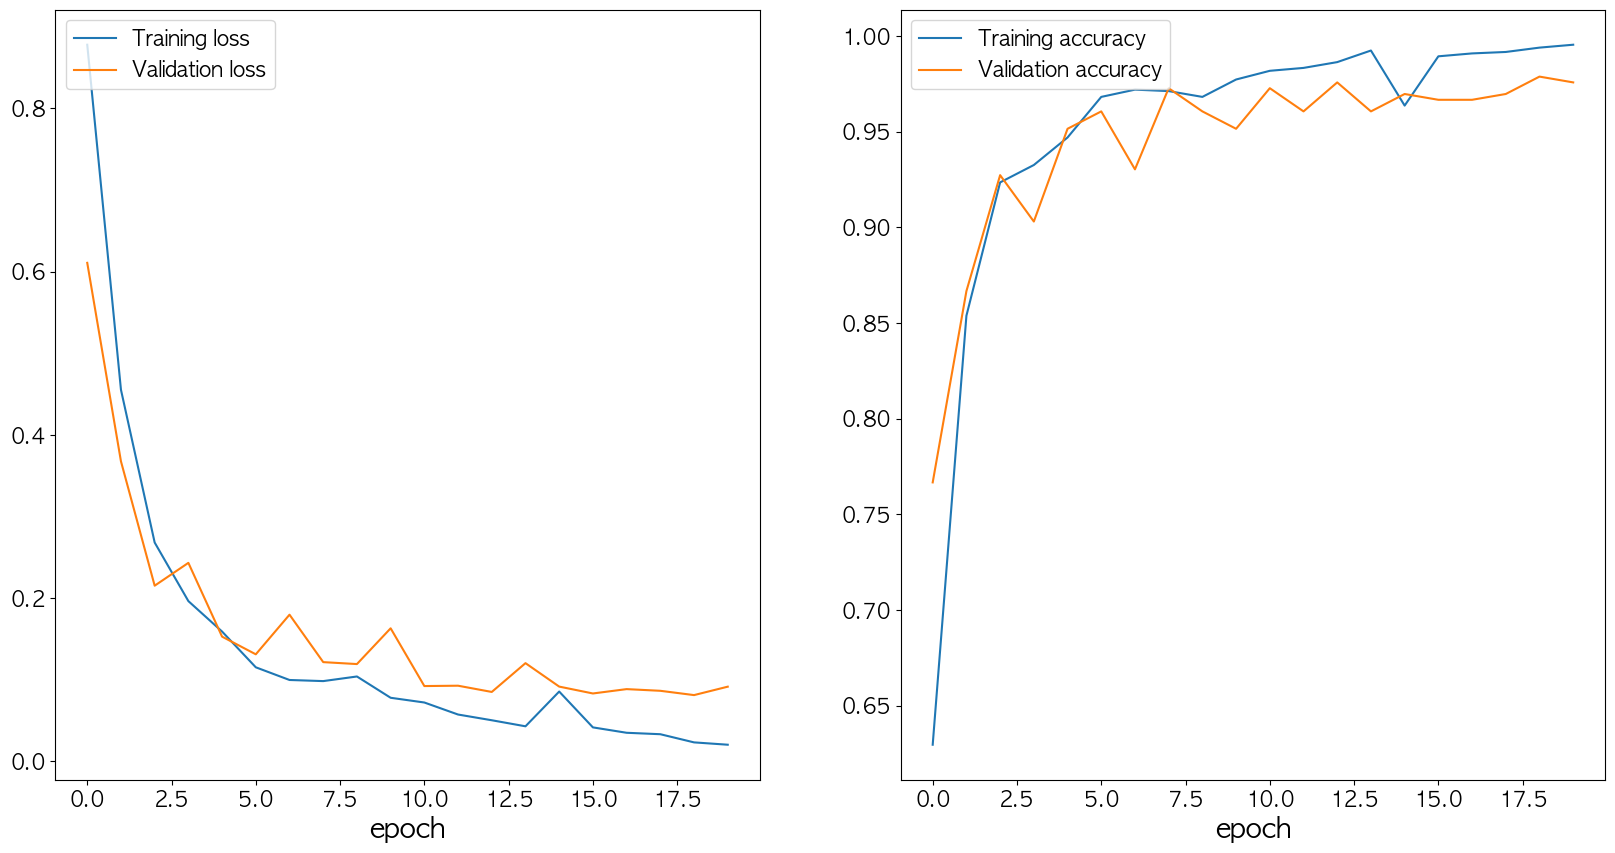

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=20, verbose=2, validation_data=(x_val, y_val))


plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Training loss', 'Validation loss'], loc='upper left', fontsize=15)

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left', fontsize=15)

plt.show()

### (6) 드롭아웃

Epoch 1/20


2022-12-29 14:40:45.154821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42/42 - 1s - loss: 0.3694 - accuracy: 0.9273 - val_loss: 0.2463 - val_accuracy: 0.9424


2022-12-29 14:40:45.542907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
42/42 - 0s - loss: 0.2840 - accuracy: 0.9295 - val_loss: 0.1111 - val_accuracy: 0.9758
Epoch 3/20
42/42 - 0s - loss: 0.1590 - accuracy: 0.9538 - val_loss: 0.0843 - val_accuracy: 0.9727
Epoch 4/20
42/42 - 0s - loss: 0.1765 - accuracy: 0.9485 - val_loss: 0.2528 - val_accuracy: 0.9364
Epoch 5/20
42/42 - 0s - loss: 0.2518 - accuracy: 0.9227 - val_loss: 0.1631 - val_accuracy: 0.9636
Epoch 6/20
42/42 - 0s - loss: 0.1884 - accuracy: 0.9447 - val_loss: 0.1285 - val_accuracy: 0.9667
Epoch 7/20
42/42 - 0s - loss: 0.2008 - accuracy: 0.9485 - val_loss: 0.1150 - val_accuracy: 0.9758
Epoch 8/20
42/42 - 0s - loss: 0.1585 - accuracy: 0.9409 - val_loss: 0.1304 - val_accuracy: 0.9636
Epoch 9/20
42/42 - 0s - loss: 0.2448 - accuracy: 0.9356 - val_loss: 0.1801 - val_accuracy: 0.9667
Epoch 10/20
42/42 - 0s - loss: 0.1241 - accuracy: 0.9523 - val_loss: 0.1282 - val_accuracy: 0.9667
Epoch 11/20
42/42 - 0s - loss: 0.1392 - accuracy: 0.9417 - val_loss: 0.1274 - val_accuracy: 0.9758
Epoch 12/20
42/42 

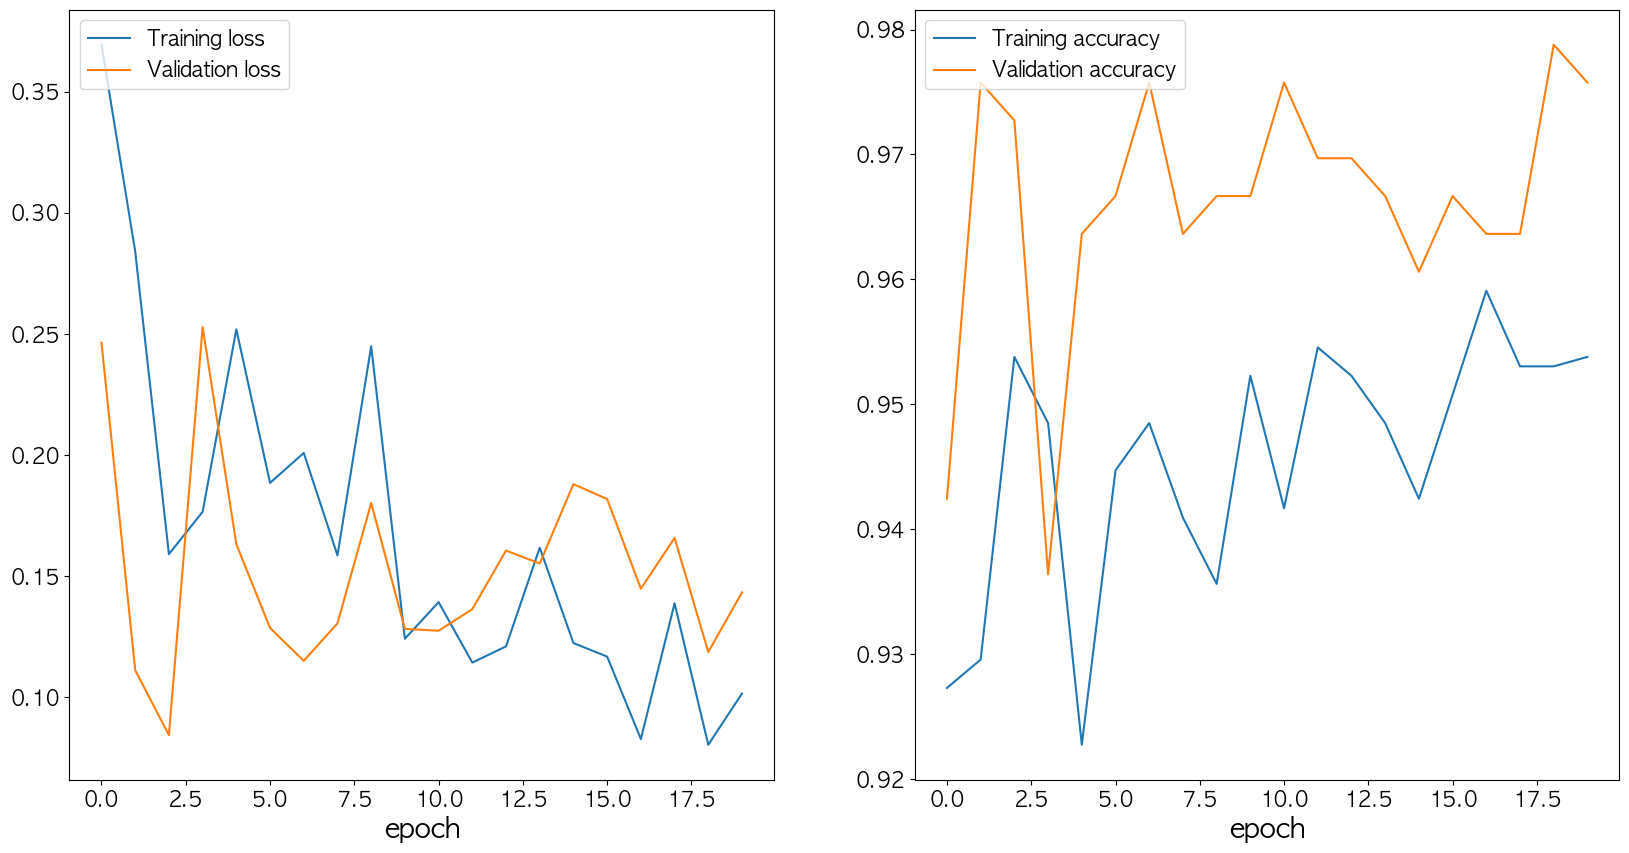

In [7]:
model.add(keras.layers.Dropout(0.05))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=20, verbose=2, validation_data=(x_val, y_val))


plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Training loss', 'Validation loss'], loc='upper left', fontsize=15)

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left', fontsize=15)

plt.show()

### (7) x_test, y_test 생성

In [8]:
# Rock
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")
    
image_dir_path = os.getenv("HOME") + "/rsp1/rock"
resize_images(image_dir_path)  #150장

# Scissors
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")
    
image_dir_path = os.getenv("HOME") + "/rsp1/scissors"
resize_images(image_dir_path)  #150장

# Paper
def resize_images(img_path):
    images=glob.glob(img_path + "/*.png")  
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "png")
    
image_dir_path = os.getenv("HOME") + "/rsp1/paper"
resize_images(image_dir_path)  #150장



def load_data(img_path, number_of_data=450):  # 가위바위보 이미지 개수 총 450장
    img_size=28
    color=3
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/rsp1"
(x_test, y_test)=load_data(image_dir_path)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

### (8) test_accuracy 측정

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

15/15 [==============================] - 0s 6ms/step - loss: 0.1680 - accuracy: 0.9733
test_loss: 0.16798439621925354
test_accuracy: 0.9733333587646484


# 3. Conclusion

___________________________________________________________________________________________________________________

**'인공지능과 가위바위보하기'** 프로젝트에서는 png 이미지를 사용하여 딥러닝 모델을 설계, 검증, 테스트 하였는데

이를 위해,

(1) 데이터 불러오기 + Resizing → (2) Traning_data, Validation_data 생성 → (3) 이미지 샘플 불러오기 → (4) 딥러닝 네트워크 설계하기 → (5) 딥러닝 네트워크 학습과 검증 → (6) 드롭아웃 → (7) x_test, y_test 생성 → (8) test_accuracy 측정의 과정을 거쳤다.

___________________________________________________________________________________________________________________


딥러닝 모델 학습 과정에서는 훈련 손실이 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어지므로, 과대적합을 막기 위해 두 가지 방법을 사용하였다.

첫째, 데이터 제공자의 다양성을 크게 높였으며, 데이터 셋의 크기를 600장 → 2100장으로 늘렸다. 총 2100장의 png 파일 중 Train_data에 1320장, Validation_data에 330장, Test_data에 450장을 사용하였다.

둘째, 드롭아웃 기법을 사용하였는데, 드롭아웃은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는 신경망에 특화된 규제 방법이다.

    그 결과 [accuracy: 0.9955, val_accuracy: 0.9758]로 과대적합이었던 모델이 
        → [accuracy: 0.9538, val_accuracy: 0.9758]가 되었으며, test_accuracy는 0.9733을 달성하였다. 


cf.) 입력은 0~1 사이의 값으로 정규화 하였으며, 출력은 0, 1, 2이므로 정규화 할 필요가 없었다.

# 4. References 

[1] 혼자 공부하는 머신러닝 + 딥러닝

[2] https://www.google.co.kr

[3] https://lms.aiffel.io/course/382/node/496